<a href="https://colab.research.google.com/github/Scorpion259/Collab/blob/main/%D0%A1%D0%98%D0%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import seaborn as sns

In [22]:
df_name = "Airline_customer_satisfaction.csv"
df = pd.read_csv(df_name)
df

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [24]:
df.nunique()

,0
satisfaction,2
Customer Type,2
Age,75
Type of Travel,2
Class,3
Flight Distance,5398
Seat comfort,6
Departure/Arrival time convenient,6
Food and drink,6
Gate location,6


In [25]:
df.isnull().sum()

,0
satisfaction,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Seat comfort,0
Departure/Arrival time convenient,0
Food and drink,0
Gate location,0


In [26]:
# Удаление строк с пропущенными значениями
df.dropna(inplace=True)

In [27]:
df.duplicated().sum()

0

In [28]:
# Вывод основных статистических характеристик
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1981.008974,2.838586,2.990277,2.852024,2.990377,3.249160,3.383745,3.519967,3.472171,3.465143,3.486118,3.695460,3.340729,3.705886,3.352545,14.643385,15.091129
std,15.117597,1026.884131,1.392873,1.527183,1.443587,1.305917,1.318765,1.345959,1.306326,1.305573,1.270755,1.292079,1.156487,1.260561,1.151683,1.298624,37.932867,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1924.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2543.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


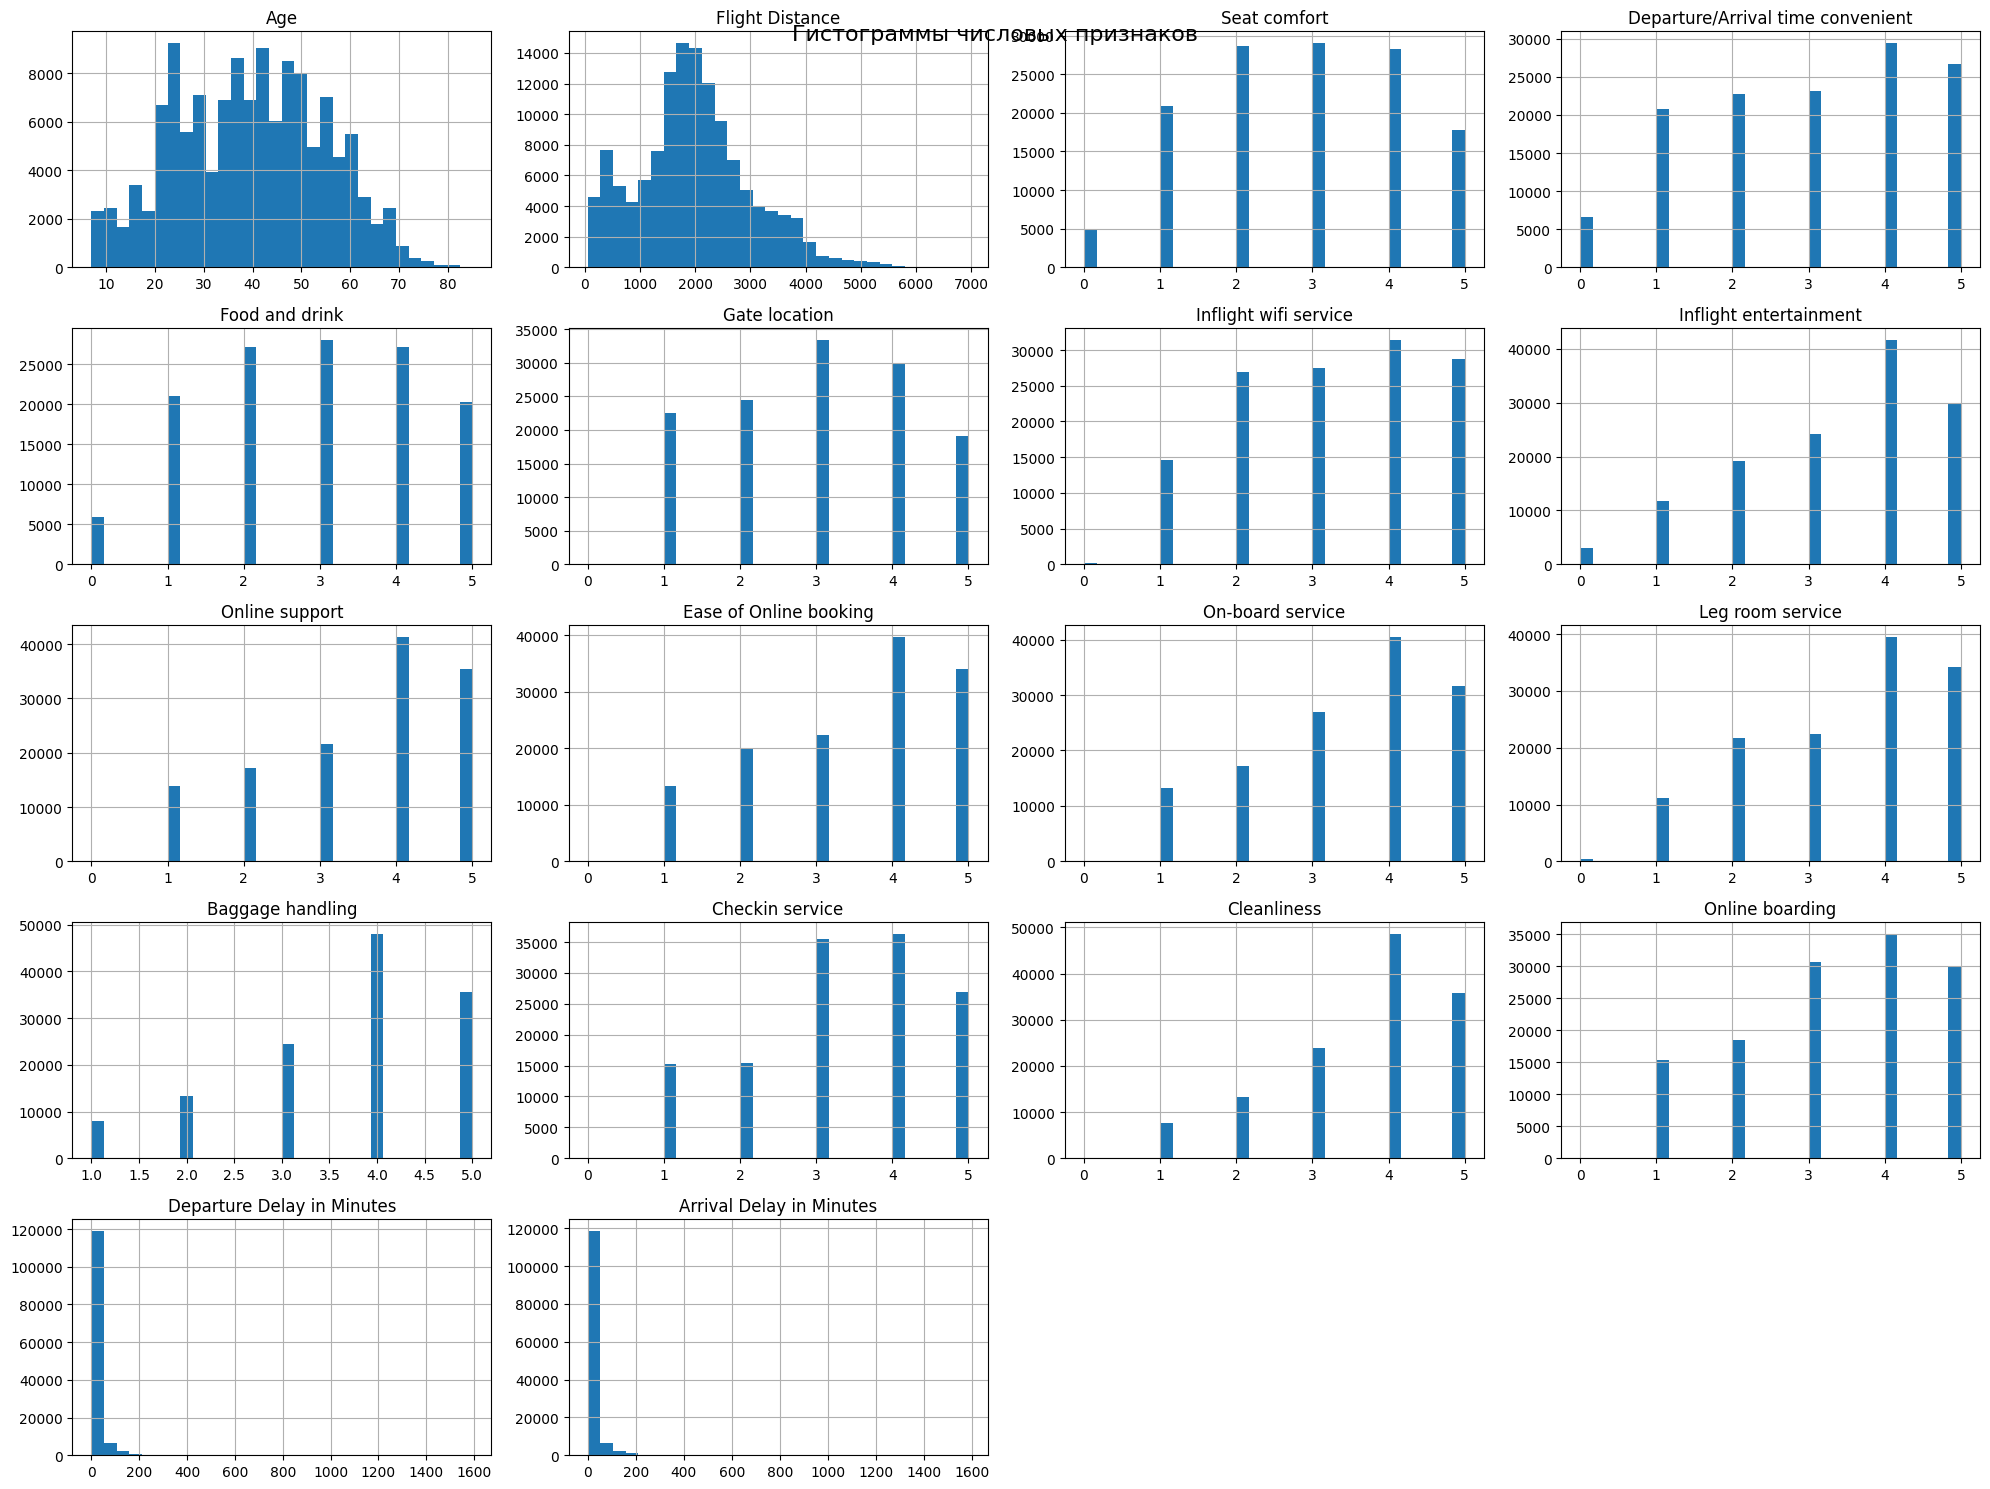

In [29]:
# Построение гистограмм
df.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.suptitle('Гистограммы числовых признаков', fontsize=16)
plt.show()

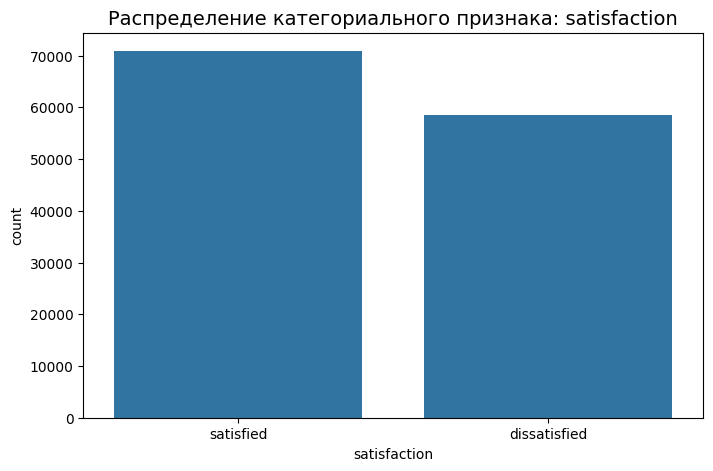

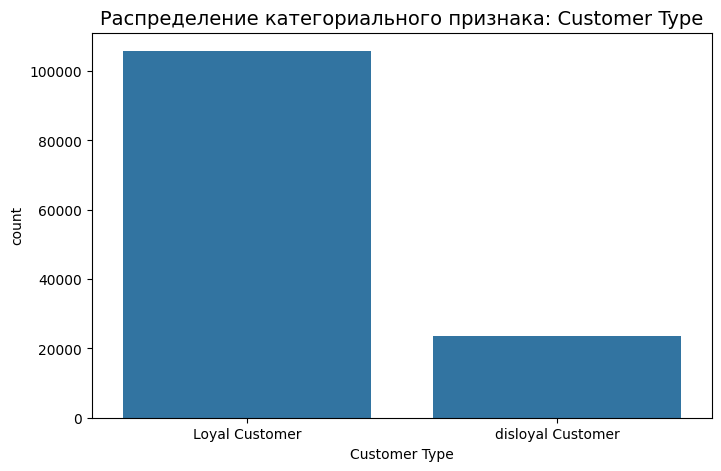

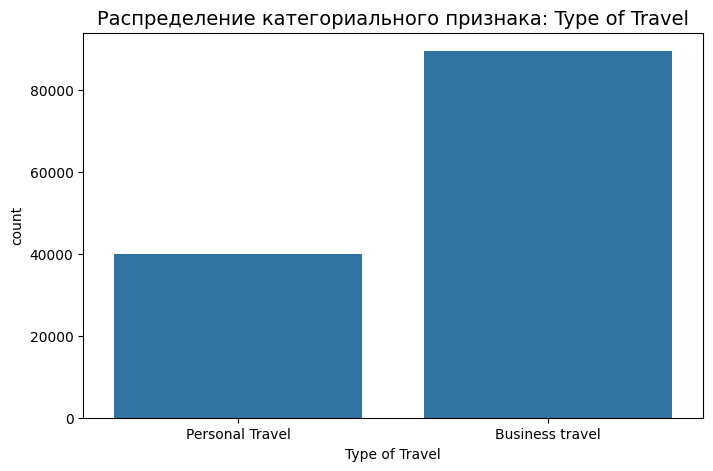

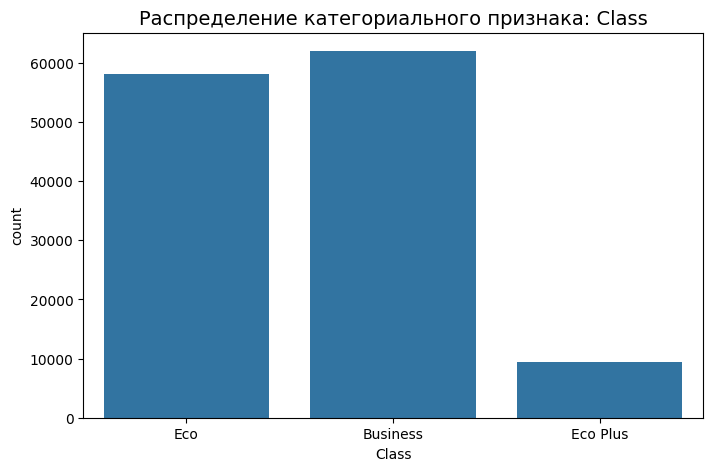

In [30]:
# Распределение категориальных признаков
categorical_columns = ['satisfaction', 'Customer Type', 'Type of Travel', 'Class']
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df[column])
    plt.title(f'Распределение категориального признака: {column}', fontsize=14)
    plt.show()

In [31]:
# Преобразование категориальных данных
categorical_columns = ['satisfaction', 'Customer Type', 'Type of Travel', 'Class']
encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = encoder.fit_transform(df[column])

df

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,65,1,1,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1,0,47,1,0,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1,0,15,1,1,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1,0,60,1,1,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1,0,70,1,1,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,1,29,1,1,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129876,0,1,63,1,0,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129877,0,1,69,1,1,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,0,1,66,1,1,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0


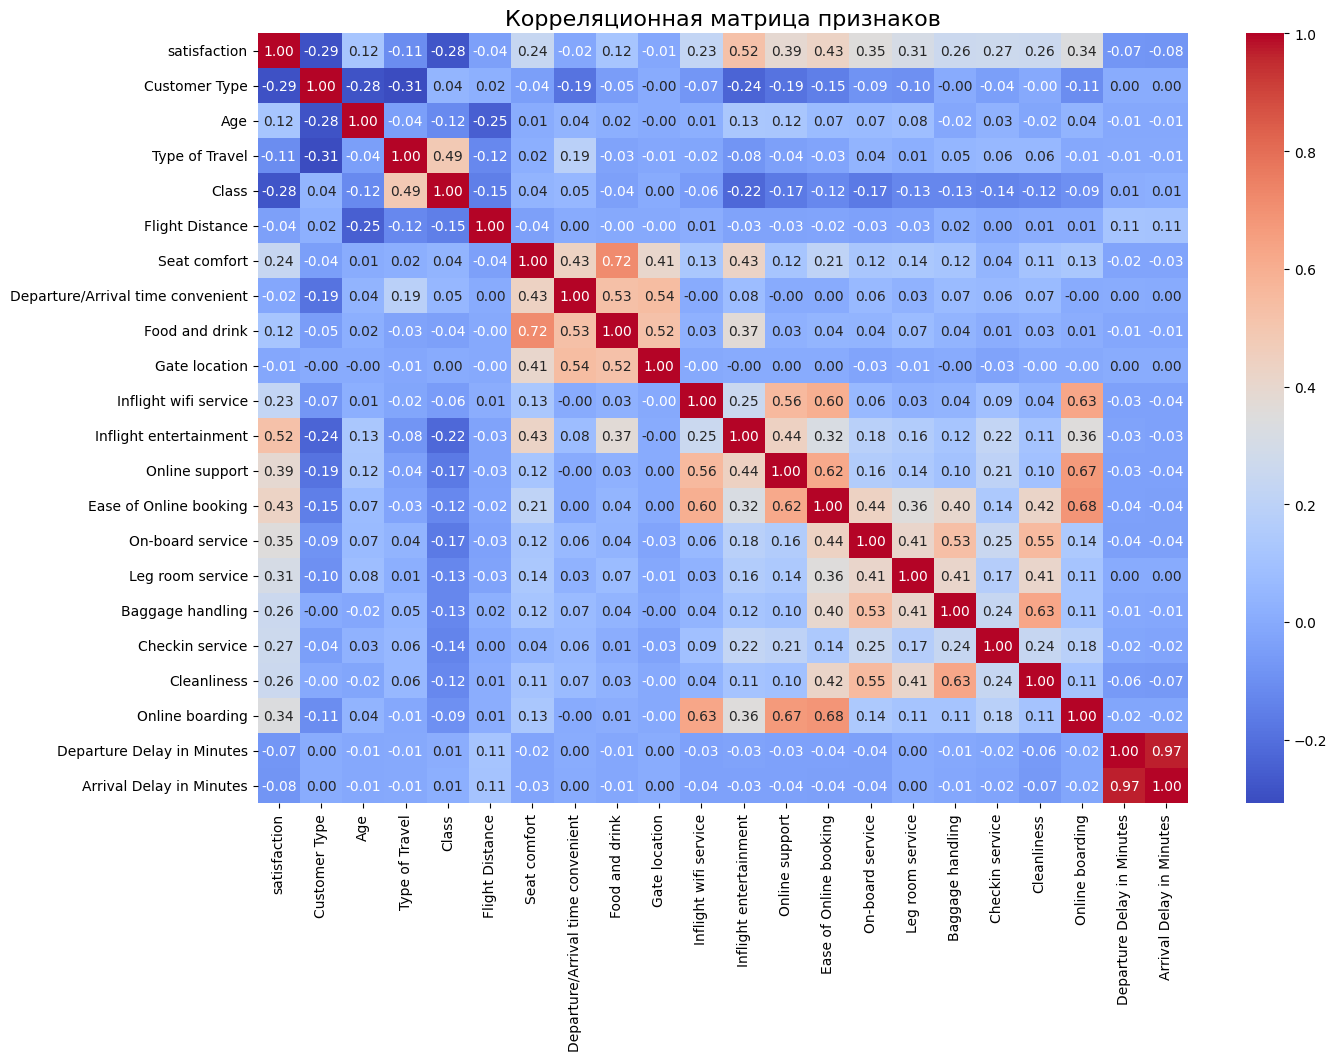

In [32]:
# Построение корреляционной матрицы
plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Корреляционная матрица признаков', fontsize=16)
plt.show()

In [33]:
# Список признаков для масштабирования
numerical_features = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
rating_features = [
    'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
    'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking',
    'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness',
    'Online boarding'
]

# Создание копии датасета
data_scaled = df.copy()

# Масштабирование числовых признаков (StandardScaler)
scaler_standard = StandardScaler()
data_scaled[numerical_features] = scaler_standard.fit_transform(data_scaled[numerical_features])

# Масштабирование рейтинговых признаков (MinMaxScaler)
scaler_minmax = MinMaxScaler()
data_scaled[rating_features] = scaler_minmax.fit_transform(data_scaled[rating_features])

# Проверим первые строки масштабированного датасета
print(data_scaled.head())

   satisfaction  Customer Type       Age  Type of Travel  Class  \
0             1              0  1.691495               1      1   
1             1              0  0.500825               1      0   
2             1              0 -1.615922               1      1   
3             1              0  1.360753               1      1   
4             1              0  2.022237               1      1   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0        -1.671090           0.0                                0.0   
1         0.470348           0.0                                0.0   
2         0.152882           0.0                                0.0   
3        -1.322461           0.0                                0.0   
4        -1.584420           0.0                                0.0   

   Food and drink  Gate location  ...  Online support  Ease of Online booking  \
0             0.0            0.4  ...             0.4                     0.6   
1       

In [35]:
df

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,65,1,1,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1,0,47,1,0,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1,0,15,1,1,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1,0,60,1,1,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1,0,70,1,1,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,1,29,1,1,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129876,0,1,63,1,0,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129877,0,1,69,1,1,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,0,1,66,1,1,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0


#Цель: Используя данные авиаперевозок, предсказать удовлетворенность клиента satisfaction на основе остальных признаков.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [37]:
# Определение целевой переменной (satisfaction) и признаков
X = data_scaled.drop(columns=['satisfaction'])
y = data_scaled['satisfaction']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [38]:
y_train

,satisfaction
122713,1
129590,1
66481,0
109928,1
13949,0
...,...
55863,0
117596,1
77691,0
103454,1


In [39]:
# Инициализация модели
decision_tree = DecisionTreeClassifier(random_state=42)

# Обучение модели
decision_tree.fit(X_train, y_train)

# Предсказания
y_pred_tree = decision_tree.predict(X_test)

# Оценка модели
print("Решающее дерево:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))

Решающее дерево:
Accuracy: 0.9315262439828044
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     17582
           1       0.94      0.94      0.94     21265

    accuracy                           0.93     38847
   macro avg       0.93      0.93      0.93     38847
weighted avg       0.93      0.93      0.93     38847



In [40]:
# Инициализация модели
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)

# Обучение модели
random_forest.fit(X_train, y_train)

# Предсказания
y_pred_forest = random_forest.predict(X_test)

# Оценка модели
print("\nСлучайный лес:")
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Classification Report:")
print(classification_report(y_test, y_pred_forest))


Случайный лес:
Accuracy: 0.955337606507581
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     17582
           1       0.97      0.95      0.96     21265

    accuracy                           0.96     38847
   macro avg       0.95      0.96      0.96     38847
weighted avg       0.96      0.96      0.96     38847



In [41]:
# Инициализация модели
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Обучение модели
gradient_boosting.fit(X_train, y_train)

# Предсказания
y_pred_gb = gradient_boosting.predict(X_test)

# Оценка модели
print("\nГрадиентный бустинг:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))



Градиентный бустинг:
Accuracy: 0.9192730455376219
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     17582
           1       0.93      0.93      0.93     21265

    accuracy                           0.92     38847
   macro avg       0.92      0.92      0.92     38847
weighted avg       0.92      0.92      0.92     38847

